In [1]:
from sirf.Gadgetron import AcquisitionData, CoilSensitivityData, AcquisitionModel, ImageData
import numpy as np
import sys
sys.path.append("/home/jovyan/P1-Temp-Reg/modelbased-approach/")
import auxiliary_functions as aux

In [2]:
def get_test_img():

    filepath_y = "/home/jovyan/InputData/y_4.h5"
    y = AcquisitionData(filepath_y)
    u = ImageData()
    u.from_acquisition_data(y)


    csm = CoilSensitivityData()
    csm.calculate(y)

    A = AcquisitionModel(acqs=y, imgs=u)
    A.set_coil_sensitivity_maps(csm)

    u_test = A.inverse(y)

    return u_test

Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5


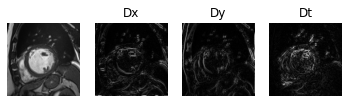

True

In [3]:
import matplotlib.pyplot as plt
def test_Gradient1D():
#     weights = ImageData()
# weights.from_acquisition_data(y)
# weights.fill(1.0)

    u = get_test_img()
    
    Gx = aux.Gradient1D(axis=1)
    Gy = aux.Gradient1D(axis=2)
    Gt = aux.Gradient1D(axis=0)
    
    
    dxu = Gx.forward(u)
    dyu = Gy.forward(u)
    dtu = Gt.forward(u)
    
    f,ax = plt.subplots(1,4)
    ax[0].imshow( np.abs(u.as_array()[0,:,:]),cmap='gray' ) 
    ax[0].axis("off")
    
    ax[1].imshow( np.abs(dxu.as_array()[0,:,:]),cmap='gray' ) 
    ax[1].axis("off")
    ax[1].set_title("Dx")
    ax[2].imshow( np.abs(dyu.as_array()[0,:,:]),cmap='gray' )
    ax[2].set_title("Dy")
    ax[2].axis("off")
    ax[3].imshow( np.abs(dtu.as_array()[2,:,:]),cmap='gray' )
    ax[3].set_title("Dt")
    ax[3].axis("off")
    
    plt.show()
    
    return True

test_Gradient1D()

In [4]:


    
Gx = aux.Gradient1D(axis=0)
Gy = aux.Gradient1D(axis=1)
Gt = aux.Gradient1D(axis=2)
    
print(test_image_operator_adjointness(Gx))
print(test_image_operator_adjointness(Gy))
print(test_image_operator_adjointness(Gt))
    

Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5
1.712108890125412e-05
True
Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5
1.8397102880844794e-05
True
Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5
2.310505870191762e-06
True


In [5]:
def test_stacked_image_operator_adjointness(operator, tol=1e-2):
    
    u = get_test_img()
    u = u.fill(np.random.randn(*u.shape))
    
    Ou = operator.forward(u)
    
    b0 = Ou[0].copy().fill(np.random.randn(*u.shape))
    b1 = Ou[1].copy().fill(np.random.randn(*u.shape))
    
    b = (b0,b1)
        
    OHb = operator.backward(b) 
    u_OHb = np.vdot( u.as_array(), OHb.as_array())
    
    Ou =  np.stack((Ou[0].as_array()[:], Ou[1].as_array()[:]), axis=0)
    b = np.stack((b[0].as_array()[:], b[1].as_array()[:]), axis=0)
    Ou_b = np.vdot( Ou, b)
    
    diff_relative = 2* np.abs(Ou_b - u_OHb) / np.abs(Ou_b + u_OHb)
    print(diff_relative)
        
    return np.abs(diff_relative) < tol

In [6]:
nabla = aux.Dx()
dt = aux.Dt()
print(test_stacked_image_operator_adjointness(nabla))
print(test_image_operator_adjointness(dt))


Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5
8.894363863978493e-07
True
Started reading acquisitions from /home/jovyan/InputData/y_4.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..100%..
Finished reading acquisitions from /home/jovyan/InputData/y_4.h5
7.002779665853615e-06
True
